# Clustering Antarctic Penguin Species
The aim of this analysis is to use k-means clustering to identify patterns, clusters and relationships to group the information in the dataset. They are three species that are native to this region: **Adelie**, **Chinstrap**, and **Gentoo**. 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The data is available in csv-Format as `penguins.csv`.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read csv and set to Dataframe  
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# Examining the dataset
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


Based on the columns and the first few rows of the dataset, it should be noted that culmen length, culmen depth, and flipper length should be investigated to classify the groups. Body mass and sex does not have a significant difference to be used to group the information.

## Data Preparation

In [3]:
# Convert categorical variables into dummy/indicator variables
# dtype='int' ensure the output will be 0/1 instead of True/False
penguins_df = pd.get_dummies(penguins_df, dtype='int') 

In [4]:
# Perform preprocessing steps on the dataset - standarizing/scaling
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


## Data Analysis

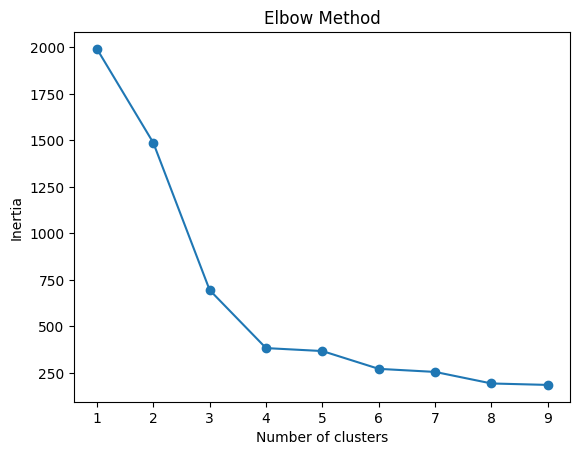

In [5]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the elbow method, the optimal number of clusters for k-means clustering is 4.

In [29]:
# Run the k-means clustering algorithm
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['group'] = kmeans.labels_

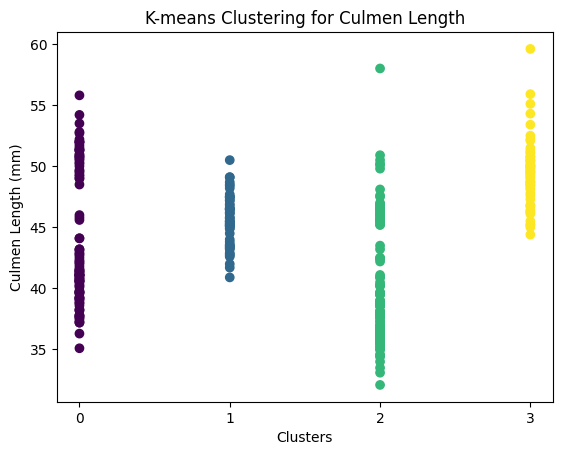

In [30]:
# Visualize the clusters 
plt.scatter(penguins_df['group'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Clusters')
plt.ylabel('Culmen Length (mm)')
plt.xticks(range(int(penguins_df['group'].min()), int(penguins_df['group'].max()) + 1))
plt.title(f'K-means Clustering for Culmen Length')
plt.show()

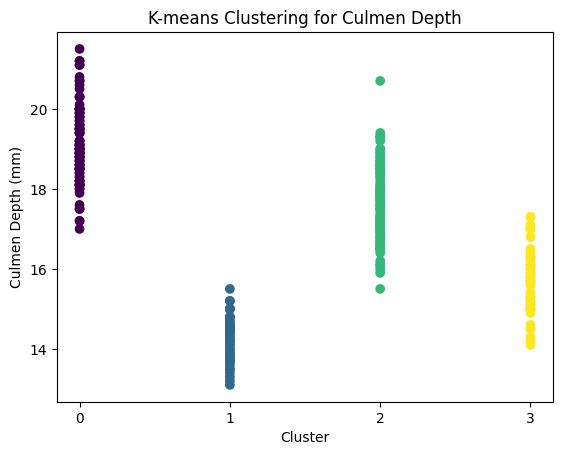

In [25]:
plt.scatter(penguins_df['group'], penguins_df['culmen_depth_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Culmen Depth (mm)')
plt.xticks(range(int(penguins_df['group'].min()), int(penguins_df['group'].max()) + 1))
plt.title(f'K-means Clustering for Culmen Depth')
plt.show()

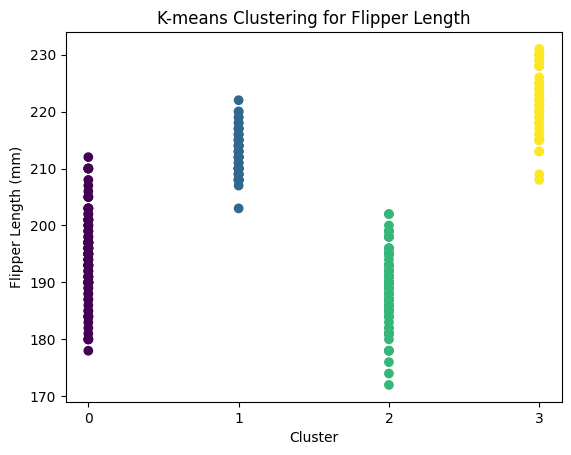

In [31]:
plt.scatter(penguins_df['group'], penguins_df['flipper_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Flipper Length (mm)')
plt.xticks(range(int(penguins_df['group'].min()), int(penguins_df['group'].max()) + 1))
plt.title(f'K-means Clustering for Flipper Length')
plt.show()

## Conclusion

In [33]:
# Step 6 - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','group']
stat_penguins = penguins_df[numeric_columns].groupby('group').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
group,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984


Based on the clusters, it is noted that the clusters have its differences. However, group 0 and 2 could be merge together to have three distinct groups. Therefore, these values could help classify each penguin.